In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import Levenshtein

In [7]:
# Load the files
experiment_names, dfs, failed_dfs = [], [], []
for file_name in os.listdir():
    if 'analysis' not in file_name and 'failed' not in file_name:
        experiment_names.append(file_name[: -4])

for name in experiment_names:
    dfs.append(pd.read_csv(f'{name}.csv'))
    failed_dfs.append(pd.read_csv(f'{name}_failed.csv'))


In [8]:
# %Failed
for idx, name in enumerate(experiment_names):
    print(name)
    print(f'#Success: {len(dfs[idx])}, #Failed {len(failed_dfs[idx])}, {len(dfs[idx]) / (len(dfs[idx]) + len(failed_dfs[idx]))}')

poc_bertscore_down_0.05_500
#Success: 413, #Failed 87, 0.826
poc_bleu4_down_0.05_500
#Success: 354, #Failed 146, 0.708
poc_bleu4_down_0.15_500
#Success: 337, #Failed 163, 0.674
poc_bleurt_down_0.05_500
#Success: 495, #Failed 5, 0.99
poc_bleurt_down_0.15_1000
#Success: 980, #Failed 20, 0.98
poc_bleurt_down_0.25_1000
#Success: 973, #Failed 27, 0.973
poc_bleurt_down_0.35_1000
#Success: 958, #Failed 42, 0.958
poc_bleurt_down_0.5_500
#Success: 467, #Failed 33, 0.934
poc_meteor_down_0.05_500
#Success: 478, #Failed 22, 0.956
poc_meteor_down_0.15_500
#Success: 426, #Failed 74, 0.852


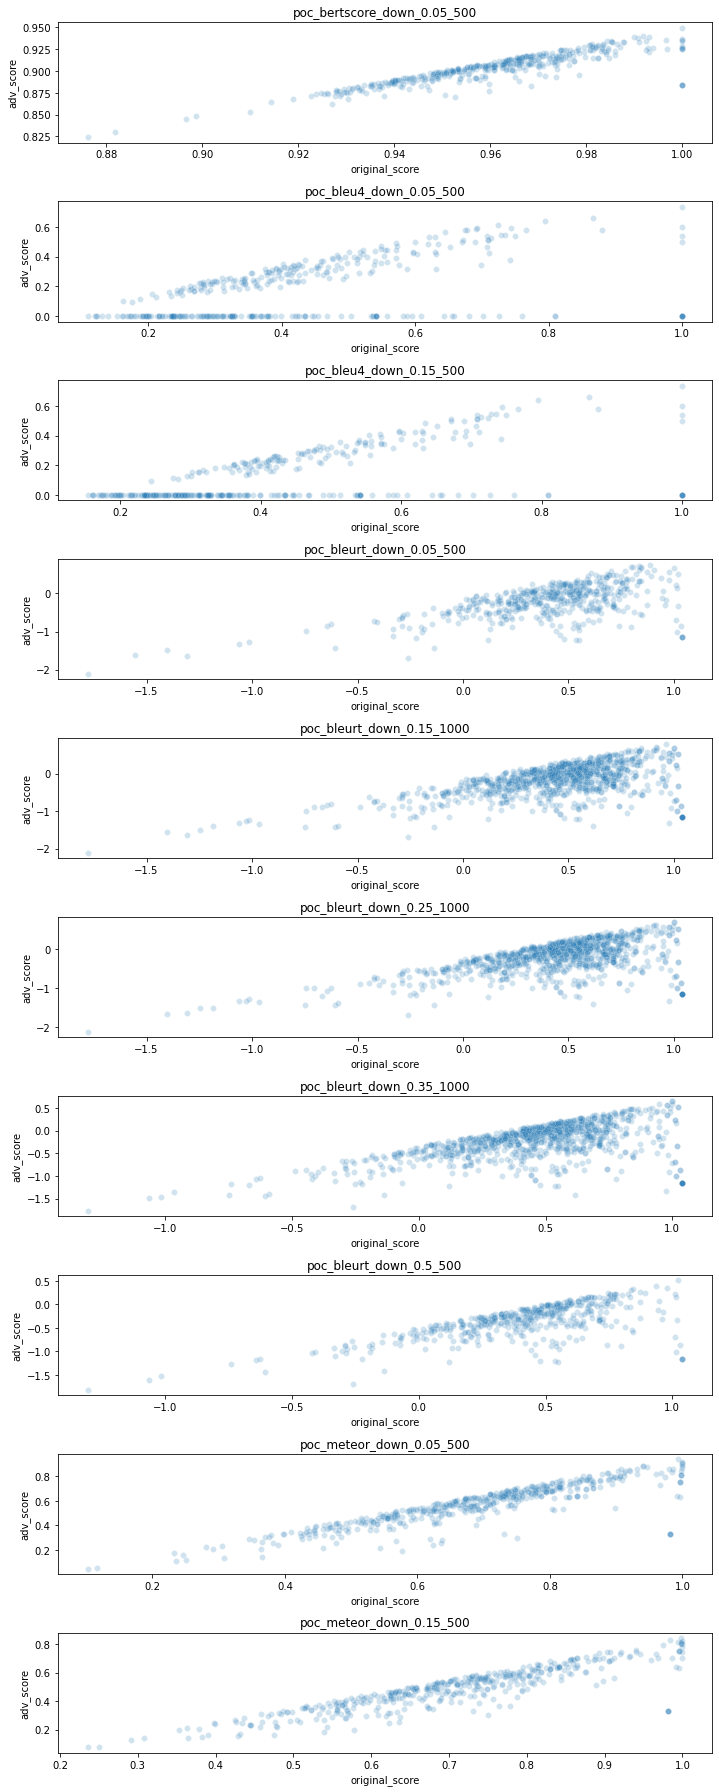

In [10]:
# Score distribution (before, after)
fig, axs = plt.subplots(len(experiment_names), 1, figsize = (10, 25), sharex = False, sharey = False)

for idx, name in enumerate(experiment_names):
    axs[idx].set_title(name)
    sns.scatterplot(ax = axs[idx], x = dfs[idx]['original_score'], y = dfs[idx]['adv_score'], alpha = 0.2)

fig.tight_layout()
plt.show()

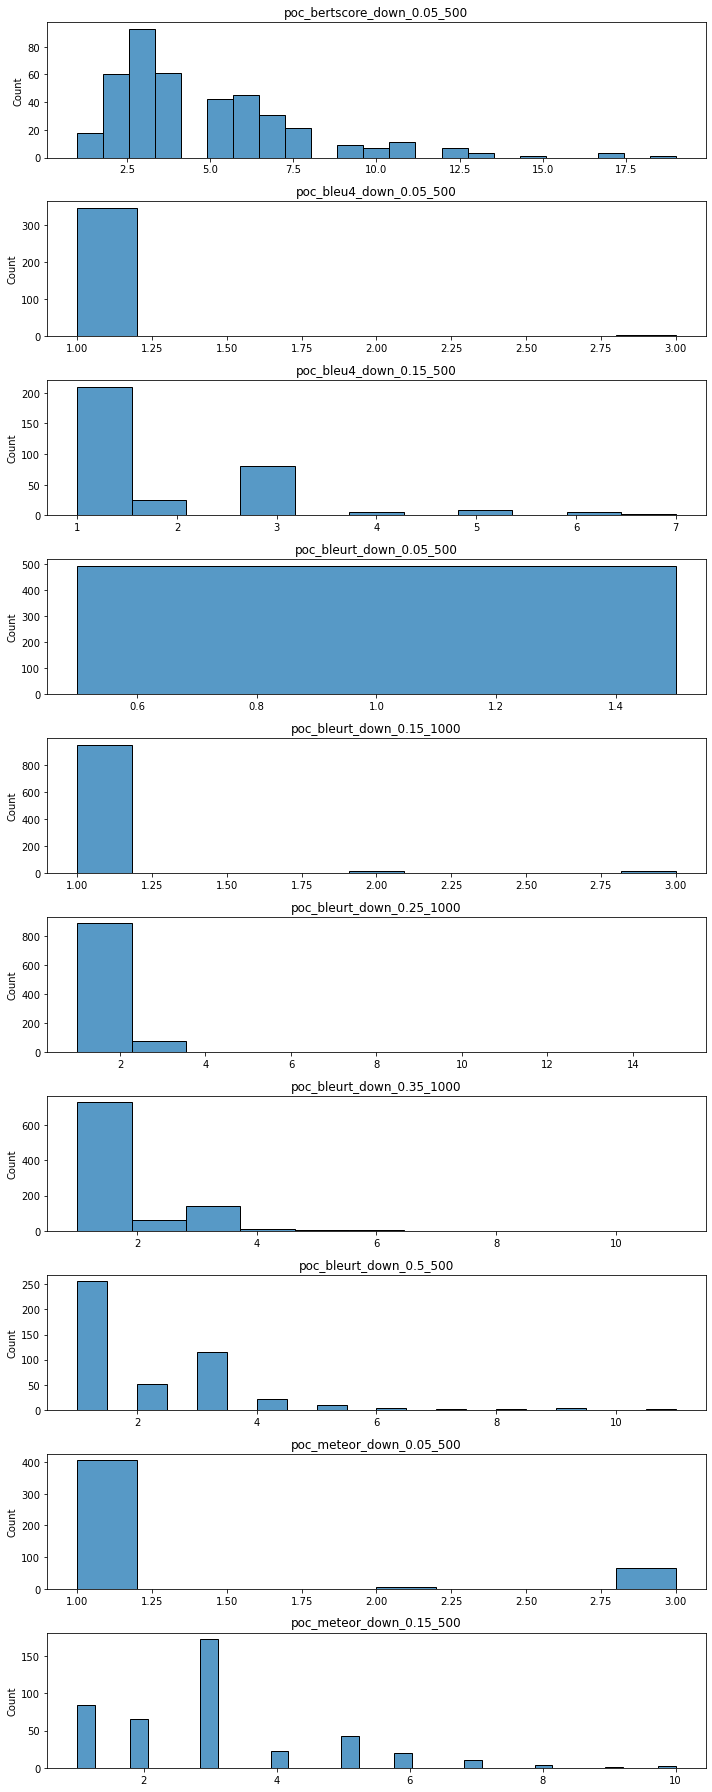

In [11]:
# Edit distance
def get_edit_dist(df):
    out = []
    for line_idx in range(len(df)):
        mt = df['mt'][line_idx]
        adv = df['adv'][line_idx]
        dist = Levenshtein.distance(mt.split(' '), adv.split(' '))
        out.append(dist)
    return out

fig, axs = plt.subplots(len(experiment_names), 1, figsize = (10, 25), sharex = False, sharey = False)

for idx, name in enumerate(experiment_names):
    axs[idx].set_title(name)
    dist = get_edit_dist(dfs[idx])
    sns.histplot(dist, ax = axs[idx])

fig.tight_layout()
plt.show()